<a href="https://colab.research.google.com/github/405620294/iShape/blob/main/nn/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [65]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

# explore data

In [66]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [67]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [68]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [69]:
transform = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'
]

frog


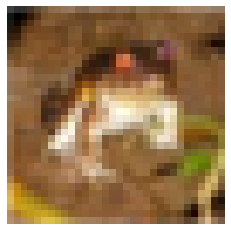

In [70]:
import matplotlib.pyplot as plt
print(transform[y_train[0][0]])
plt.axis('off')
plt.imshow(x_train[0])

# precrocessing

In [71]:
# X > 歸一化
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [72]:
# y > one hot encoding > 太占用容量 > 改用 SparseCategoricalCrossentropy

# creat a model

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten

layers = [
      # (3*3*3)*64=1728+64(bias)=1792
      Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32,32,3)),
      # no param
      MaxPooling2D(),
      # (3*3*64)*128+128=73856
      Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
      # no param
      MaxPooling2D(),
      # (3*3*128)*256+256=295128
      Conv2D(256, 3, strides=1, padding='same', activation='relu'),
      # no param 
      MaxPooling2D(),
      # no param, shape:4*4*256=4096
      Flatten(),
      # 4096*128+128=524416
      Dense(128, activation='relu'), 
      # no param
      Dropout(0.25),
      # 128*10+10=1290
      Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [87]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# training

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=20, restore_best_weights=True)
model.fit(x_train_norm, y_train, batch_size=100, epochs=50, verbose=2, validation_split=0.2, callbacks=callback)

Epoch 1/50
400/400 - 4s - loss: 1.5976 - accuracy: 0.4140 - val_loss: 1.2299 - val_accuracy: 0.5607
Epoch 2/50
400/400 - 3s - loss: 1.1732 - accuracy: 0.5838 - val_loss: 0.9790 - val_accuracy: 0.6559
Epoch 3/50
400/400 - 3s - loss: 0.9753 - accuracy: 0.6568 - val_loss: 0.8601 - val_accuracy: 0.7086
Epoch 4/50
400/400 - 3s - loss: 0.8459 - accuracy: 0.7032 - val_loss: 0.7913 - val_accuracy: 0.7302
Epoch 5/50
400/400 - 3s - loss: 0.7442 - accuracy: 0.7430 - val_loss: 0.7428 - val_accuracy: 0.7419
Epoch 6/50
400/400 - 3s - loss: 0.6657 - accuracy: 0.7674 - val_loss: 0.7396 - val_accuracy: 0.7442
Epoch 7/50
400/400 - 3s - loss: 0.5897 - accuracy: 0.7947 - val_loss: 0.7120 - val_accuracy: 0.7583
Epoch 8/50
400/400 - 3s - loss: 0.5129 - accuracy: 0.8208 - val_loss: 0.6996 - val_accuracy: 0.7665
Epoch 9/50
400/400 - 3s - loss: 0.4462 - accuracy: 0.8403 - val_loss: 0.7425 - val_accuracy: 0.7645
Epoch 10/50
400/400 - 3s - loss: 0.4014 - accuracy: 0.8561 - val_loss: 0.7612 - val_accuracy: 0.7626

# evaluating

In [89]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7282 - accuracy: 0.7545


[0.7282456755638123, 0.7544999718666077]

In [90]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = model.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre), 
             columns=[transform[i]+'(預測)' for i in range(10)], 
             index=[transform[i]+'(真實)' for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),765,14,50,23,10,8,6,10,67,47
automobile(真實),8,873,4,6,0,1,6,0,24,78
bird(真實),54,5,651,64,62,69,52,19,13,11
cat(真實),15,14,76,602,34,151,49,21,13,25
deer(真實),19,4,64,85,646,56,54,54,15,3
dog(真實),10,4,35,195,27,665,19,22,11,12
frog(真實),2,3,37,60,15,22,843,1,9,8
horse(真實),11,1,32,55,38,64,8,766,5,20
ship(真實),36,26,13,14,4,4,3,2,873,25
truck(真實),17,60,8,14,1,3,8,7,21,861


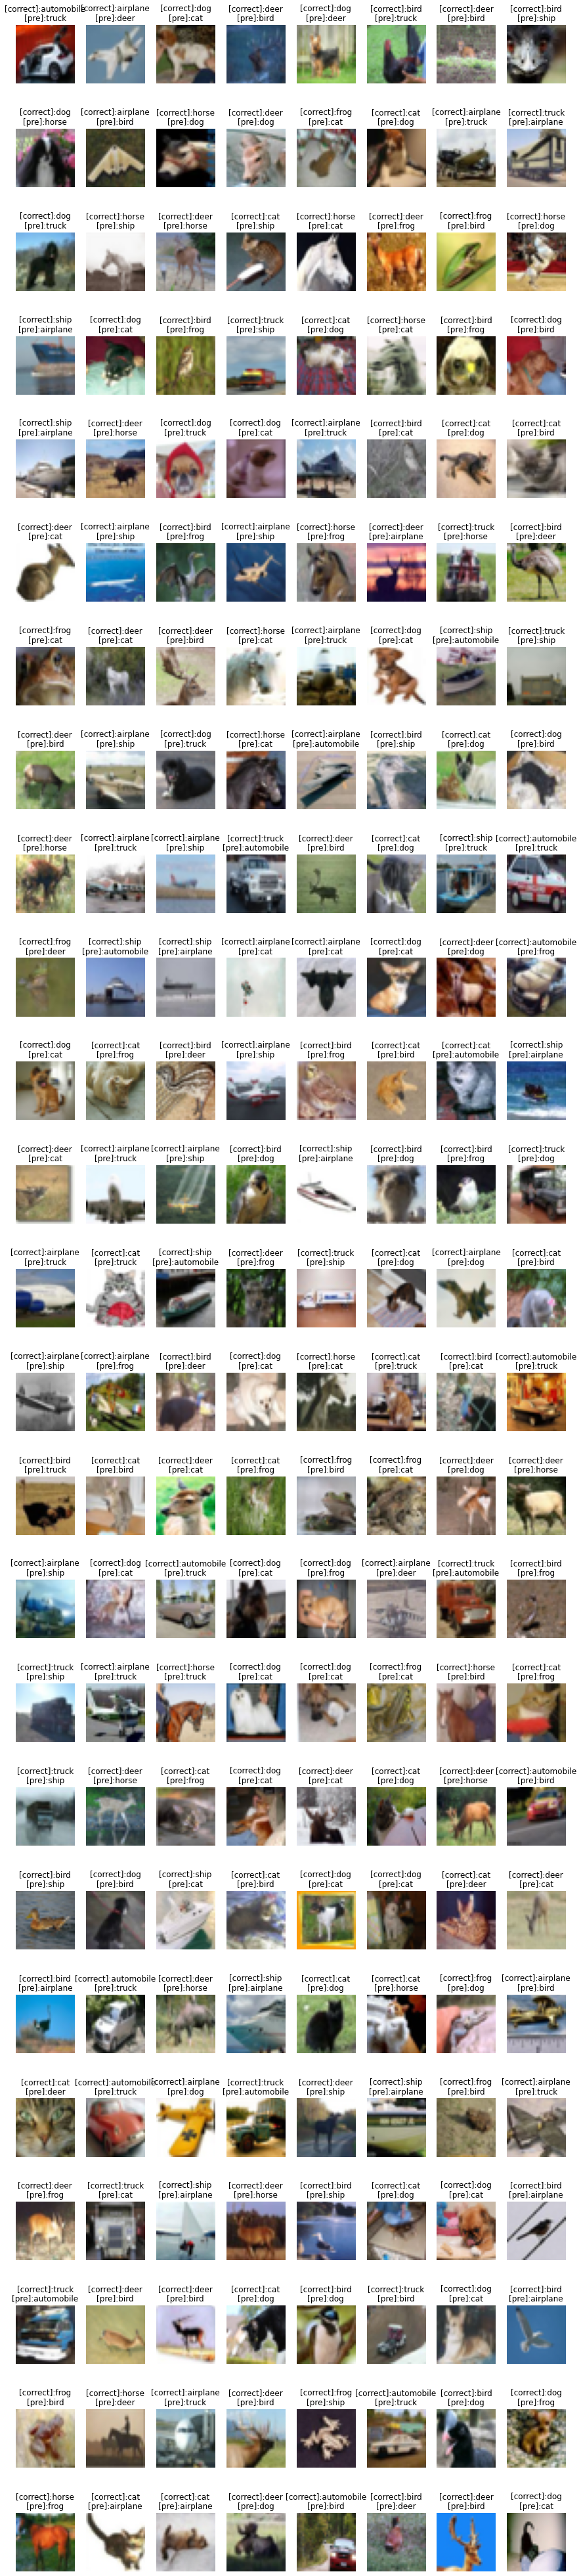

In [91]:
import numpy as np
y_test_re = y_test.reshape(-1)
idx = np.nonzero(pre != y_test_re)[0][:200]
wrong_img, wrong_pre, wrong_label = x_test[idx], pre[idx], y_test_re[idx]
plt.figure(figsize=(15,75))
w = 8
h = len(idx) / w + 1
for i in range(len(idx)):
  plt.subplot(h, w, i+1)
  plt.imshow(wrong_img[i])
  t = '[correct]:{0}\n[pre]:{1}'.format(transform[wrong_label[i]], transform[wrong_pre[i]])
  plt.title(t)
  plt.axis('off')

# make a predict

https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F28%2F2019%2F10%2Fhawaiian-airlines-plane-PLANEPAINT0919.jpg&q=85
predict: airplane
                  機率
airplane    0.661003
automobile  0.004714
bird        0.008731
cat         0.278104
deer        0.011077
dog         0.000777
frog        0.000434
horse       0.002000
ship        0.023701
truck       0.009459


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


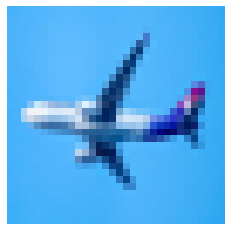

In [94]:
import requests
from PIL import Image

url = input()
header = {
      'Referer': 'https://www.google.com/',
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'
}

reponse = requests.get(str(url), headers=header,  stream=True, verify=False)
image_raw = Image.open(reponse.raw).resize((32,32)).convert('RGB')
image = np.array(image)
image = image.reshape(1, 32, 32, 3) / 255
probability = np.round(model.predict(image)[0], 8)

print('predict:', transform[model.predict_classes(image)[0]])
print(pd.DataFrame(probability, index=transform, columns=['機率']))
plt.axis('off')
plt.imshow(image_raw)